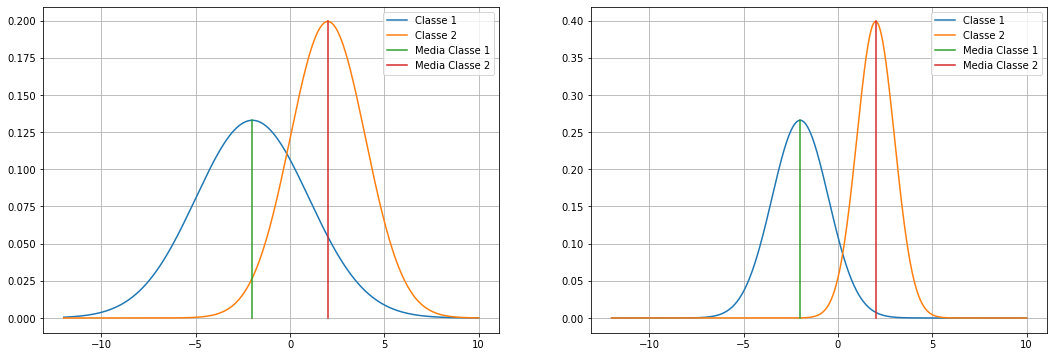

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(18,6))
plt.subplot(121)
g1 = norm(-2,3)
g2 = norm(2,2)

x=np.linspace(-12,10,500)
plt.plot(x,g1.pdf(x))
plt.plot(x,g2.pdf(x))
plt.plot([-2,-2],[0,g1.pdf(-2)])
plt.plot([2,2],[0,g2.pdf(2)])
plt.legend(['Classe 1','Classe 2','Media Classe 1', 'Media Classe 2'])
plt.grid()

plt.subplot(122)
g3 = norm(-2,1.5)
g4 = norm(2,1)
plt.plot(x,g3.pdf(x))
plt.plot(x,g4.pdf(x))
plt.plot([-2,-2],[0,g3.pdf(-2)])
plt.plot([2,2],[0,g4.pdf(2)])
plt.legend(['Classe 1','Classe 2','Media Classe 1', 'Media Classe 2'])
plt.grid()
plt.show()

In [2]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()

In [3]:
X = bcancer.data[:,np.array([0,1])].T # features
C = bcancer.target #classi

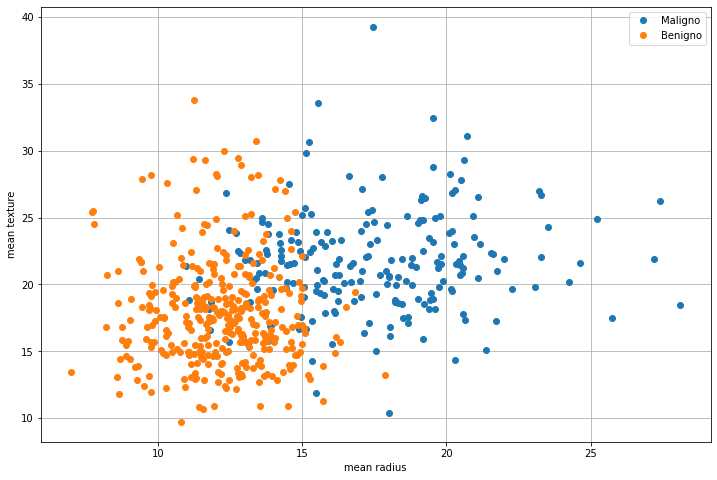

In [4]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o')
plt.legend(['Maligno','Benigno'])
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
plt.grid()
plt.show()

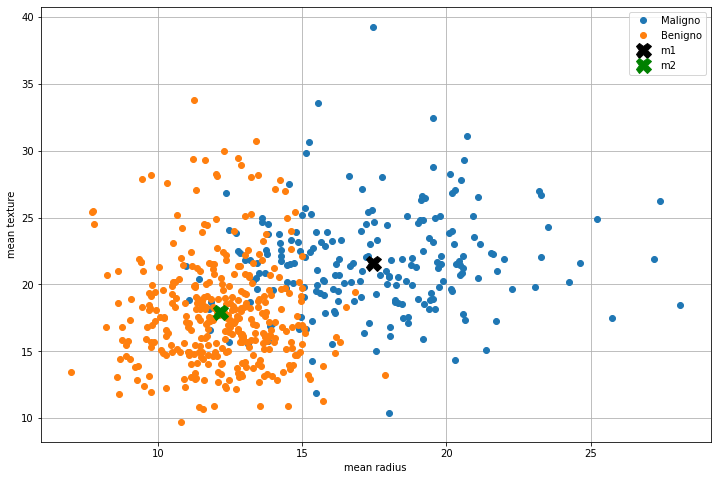

In [5]:
m1 = X[:,C==0].mean(1)
m2 = X[:,C==1].mean(1)

plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o')
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
plt.plot(m1[0],m1[1],'Xk',markersize=15)
plt.plot(m2[0],m2[1],'Xg',markersize=15)
plt.legend(['Maligno','Benigno','m1','m2'])
plt.grid()
plt.show()

In [6]:
SW = np.cov(X[:,C==0]) + np.cov(X[:,C==1])

In [8]:
from scipy.linalg import inv
w = inv(SW).dot((m2-m1))
w=w/np.sqrt((w**2).sum())
print(w)
print(np.dot(w,w.T))

[-0.96270156 -0.27056552]
1.0


In [9]:
Y=w.T.dot(X)
print(Y.shape) #adesso i dati sono unidimensionali

(569,)


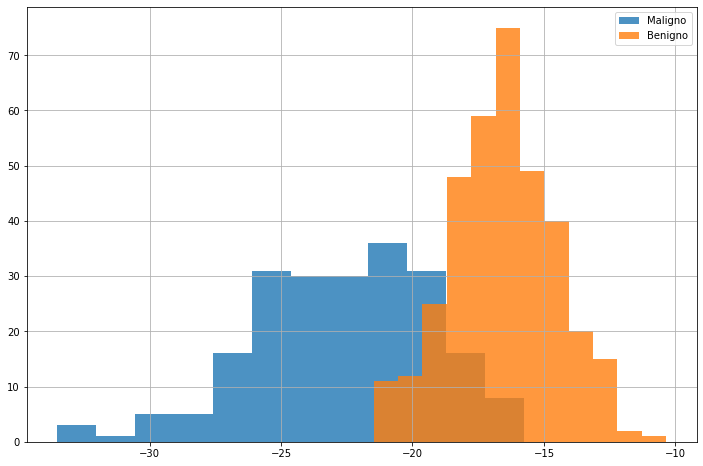

In [10]:
plt.figure(figsize=(12,8))
plt.hist(Y[C==0],alpha=0.8,bins=12)
plt.hist(Y[C==1],alpha=0.8,bins=12)
plt.legend(['Maligno','Benigno'])
plt.grid()
plt.show()

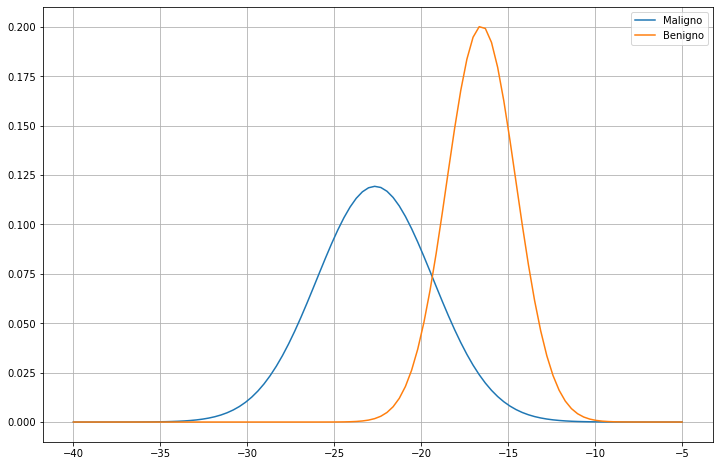

In [11]:
from scipy.stats import norm
g0 = norm(*norm.fit(Y[C==0]))
g1 = norm(*norm.fit(Y[C==1]))

x=np.linspace(-40,-5,100)

plt.figure(figsize=(12,8))
plt.plot(x,g0.pdf(x))
plt.plot(x,g1.pdf(x))
plt.legend(['Maligno','Benigno'])
plt.grid()
plt.show()

In [12]:
def risolvi(mu_1,mu_2,sigma_1,sigma_2):
    a = 1.0/(2*sigma_1**2) - 1.0/(2*sigma_2**2)
    b = mu_2/(sigma_2**2) - mu_1/(sigma_1**2)
    c = mu_1**2 /(2*sigma_1**2) - mu_2**2 / (2*sigma_2**2) - np.log(sigma_2/sigma_1)
    return np.roots([a,b,c])

solutions = risolvi(g0.mean(),g1.mean(),g0.std(), g1.std())
print (solutions)

[-19.36113911  -7.01507854]


In [15]:
y0=solutions[0]
print(y0)

-19.361139109638195


In [18]:
predictions = Y>=y0

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(C,predictions))

0.8910369068541301


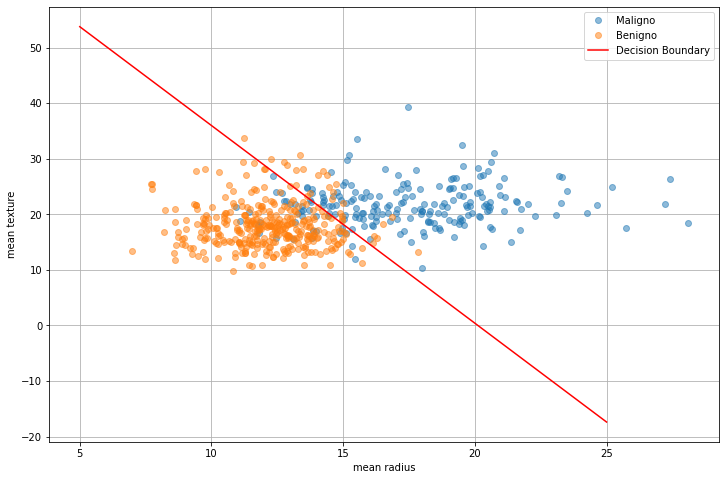

In [20]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o',alpha=0.5)
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
x1 = 5; x2 = 25;
y1 = -w[0]/w[1]*x1+y0/w[1]
y2 = -w[0]/w[1]*x2+y0/w[1]
plt.plot([x1,x2],[y1,y2],'r')
plt.legend(['Maligno','Benigno','Decision Boundary'])
plt.grid()
plt.show()

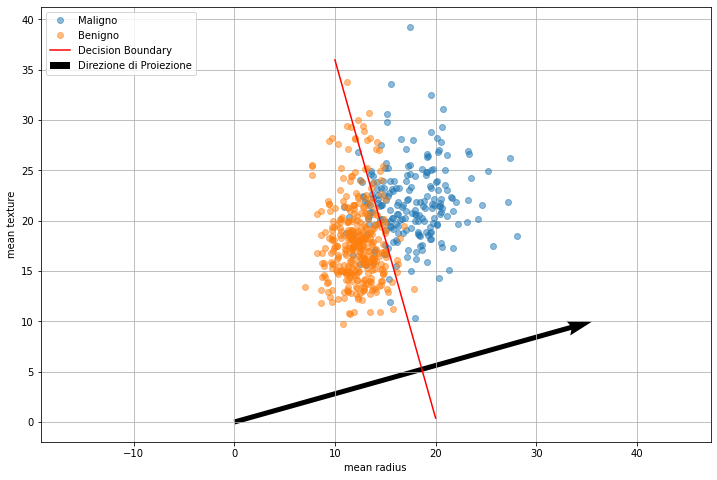

In [21]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o',alpha=0.5)
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
x1 = 10; x2 = 20;
y1 = -w[0]/w[1]*x1+y0/w[1]
y2 = -w[0]/w[1]*x2+y0/w[1]
plt.plot([x1,x2],[y1,y2],'r')
plt.quiver(0,0,-w[0],-w[1],scale=1.8)
plt.axis('equal')
plt.legend(['Maligno','Benigno','Decision Boundary','Direzione di Proiezione'],loc=2)
plt.grid()
plt.show()

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X.T,bcancer.target)

LinearDiscriminantAnalysis()

In [23]:
Y=lda.transform(X.T)
print(Y.shape)

(569, 1)


In [24]:
preds=lda.predict(X.T)

In [25]:
lda.score(X.T,bcancer.target)

0.8857644991212654

In [26]:
print("Coefficienti della LDA (w)",lda.coef_)
print("Valore soglia (w_0)",lda.intercept_)
print("Medie dei valori in ingresso\n",lda.means_)

Coefficienti della LDA (w) [[-0.90292832 -0.2221124 ]]
Valore soglia (w_0) [18.27761577]
Medie dei valori in ingresso
 [[17.46283019 21.60490566]
 [12.14652381 17.9147619 ]]


In [29]:
from statsmodels.datasets import get_rdataset
iris = get_rdataset('iris')
iris.data.head()
lda = LDA()
lda.fit(iris.data.drop('Species',axis=1),iris.data.Species)
iris_lda=lda.transform(iris.data.drop('Species',axis=1))
print(iris_lda.shape)


(150, 2)


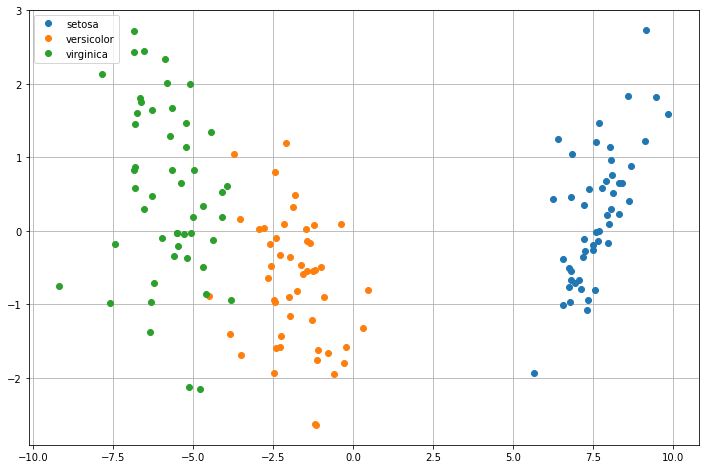

In [30]:
plt.figure(figsize=(12,8))
#otteniamo le tre classi uniche dal dataset
classes = np.unique(iris.data['Species'])
for s in classes:
    class_data = iris_lda[iris.data['Species']==s]
    plt.plot(class_data[:,0],class_data[:,1],'o')
plt.grid()
plt.legend(classes)
plt.show()

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(iris_lda,iris.data.Species)
print("Accuracy: %0.2f" % model.score(iris_lda,iris.data.Species))
print(model.predict(lda.transform([[5,4,7,10]])))
print(lda.transform([[5,4,7,10]]))

Accuracy: 0.98
['virginica']
[[-31.12319775  23.98555321]]
